In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [97]:
csv_file_data= r"D:\1-MYSELF\2-Project\programming\main project\House_price_ML\housePrice.csv"
home_price= pd.read_csv(csv_file_data)

In [98]:
home_price.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [99]:
home_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [100]:
home_price.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [101]:
home_price.nunique()

Area          243
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         934
Price(USD)    932
dtype: int64

In [102]:
home_price.shape

(3479, 8)

In [107]:
home_price.dropna(inplace=True)

home_price["Area"]= home_price["Area"].astype(str).str.replace(",", "").astype(float)
home_price.query("Area <= 500")

le= LabelEncoder()
home_price["Address"]= le.fit_transform(home_price["Address"])

try:
    for bolian in home_price:
        home_price[bolian]= home_price[bolian].astype(float)
except Exception as e:
    print(f"your error is{e}")

In [109]:
home_price.shape

(3456, 8)

<Axes: >

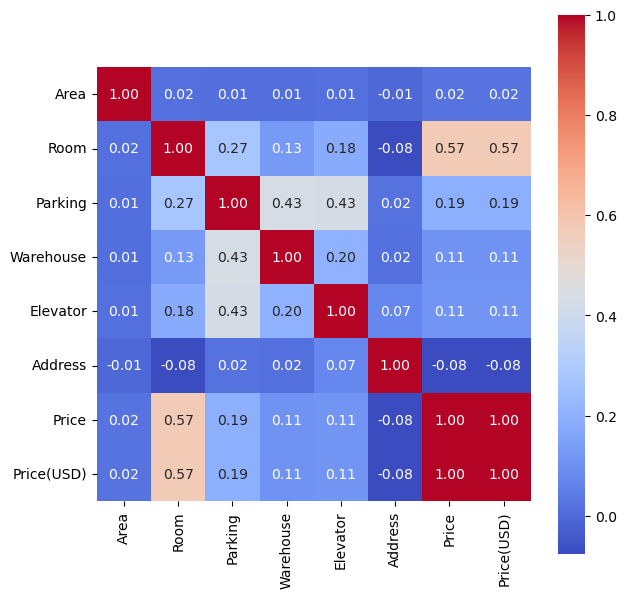

In [110]:
corr= home_price.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=True, square=True, fmt=".2f", annot= True, annot_kws={"size":10}, cmap="coolwarm")

In [120]:
cfd= home_price[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address", "Price", "Price(USD)"]]
X= np.asanyarray(cfd[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]])
Y= np.asanyarray(cfd[["Price"]])

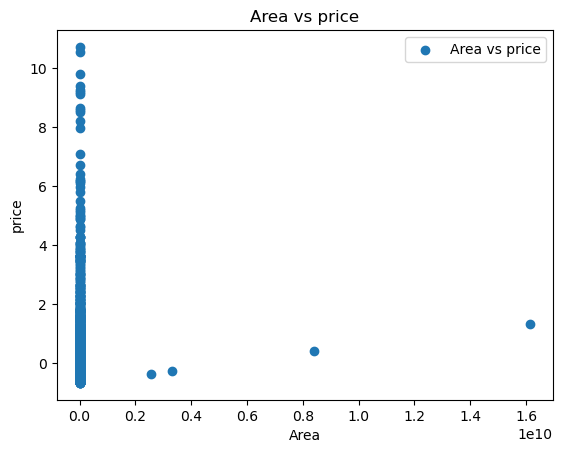

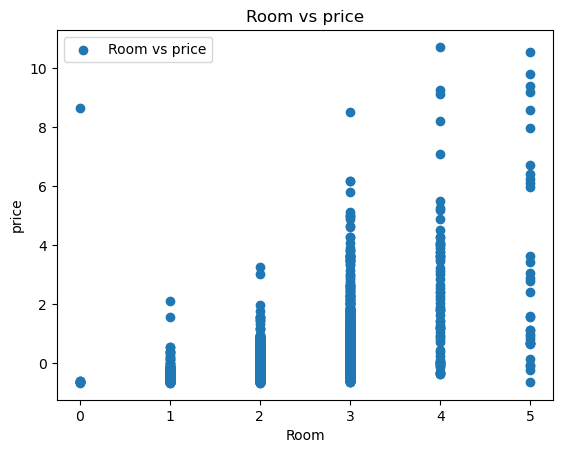

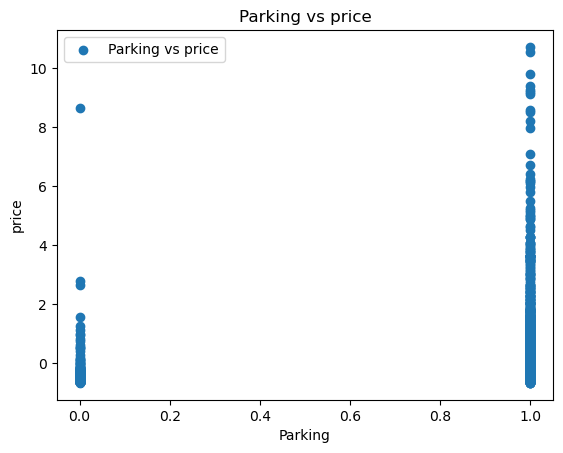

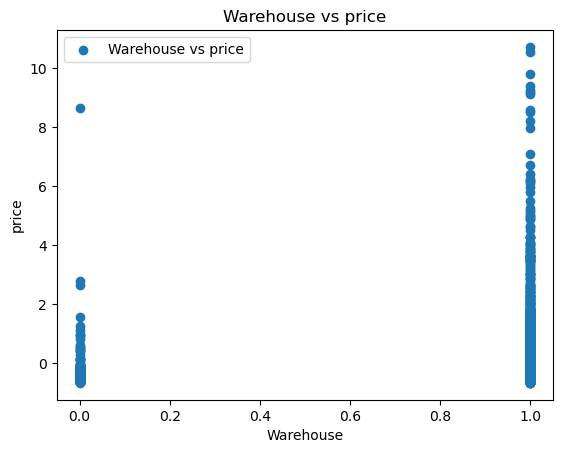

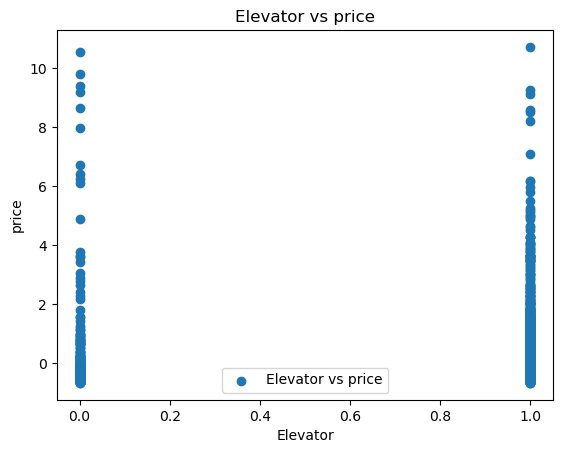

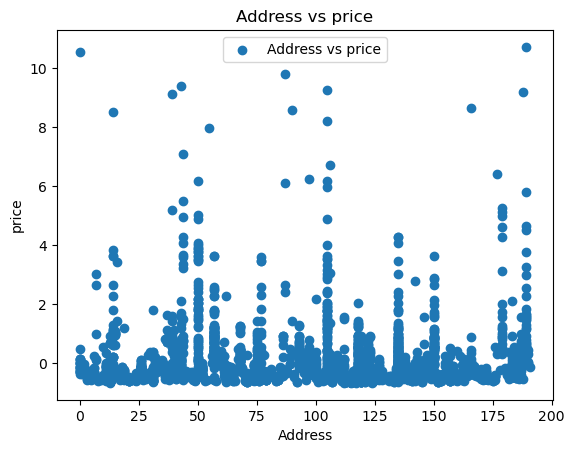

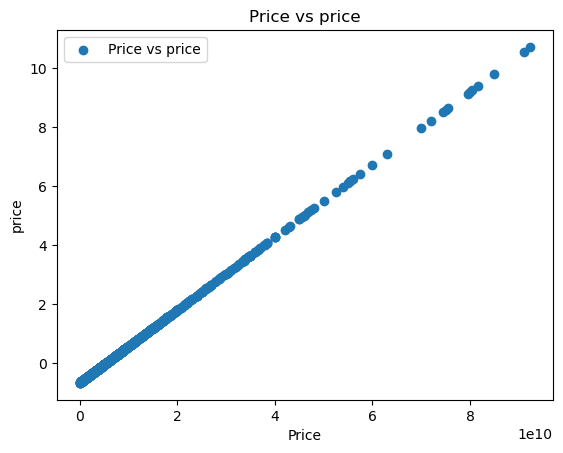

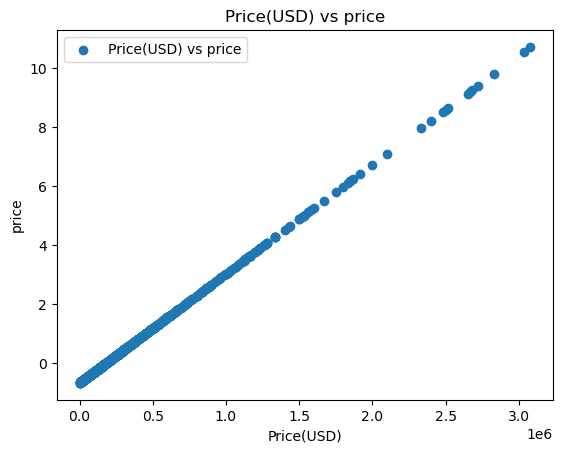

In [131]:
for column in home_price.columns:
    plt.figure()
    plt.scatter(home_price[column], Y, label= f"{column} vs price")
    plt.xlabel(column)
    plt.ylabel("price")
    plt.title(f"{column} vs price")
    plt.legend()
    plt.show()

In [122]:
Ss= StandardScaler()
X= Ss.fit_transform(X)
Y= Ss.fit_transform(Y)
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=4)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2764, 6) (692, 6) (2764, 1) (692, 1)


### LinearRegression:

In [123]:
mlr= LinearRegression()
mlr.fit(x_train,y_train)
print("coef: ", mlr.coef_)
print("intersept: ", mlr.intercept_)

coef:  [[ 0.01174302  0.53440225  0.02884638  0.00800994  0.00359615 -0.02307153]]
intersept:  [-0.00144193]


In [124]:
train_pred= mlr.predict(x_train)
test_pred = mlr.predict(x_test)

print("train")
print("R^2: ", metrics.r2_score(y_train, train_pred))
print("MSE: ", metrics.mean_absolute_error(y_train, train_pred))
print("test")
print("R^2: ", metrics.r2_score(y_test, test_pred))
print("MSE: ", metrics.mean_absolute_error(y_test, test_pred))

train
R^2:  0.32604001327965293
MSE:  0.4650678649272881
test
R^2:  0.32065820532060985
MSE:  0.519955772220434


### PolynomialRegressioin:

In [125]:
poly= PolynomialFeatures(degree=3)
train_poly= poly.fit_transform(x_train)
test_poly= poly.fit_transform(x_test)

plr= LinearRegression()
plr.fit(train_poly, y_train)
print("coef: ", plr.coef_)
print("intercept: ", plr.intercept_)

coef:  [[ 1.89853464e-01  1.36767850e+06  3.34477371e+04  6.38592551e+02
   1.27908140e+02  2.39127617e+03  1.23702490e+04 -2.21712977e+05
   1.75498736e+06  6.61383395e+05  4.53671014e+05  9.24691413e+05
   8.49110609e+05 -6.10503737e+03  1.50075425e+04  1.08015366e+04
   1.70017550e+04 -4.72829592e+03 -1.23462004e+03  3.45842418e+02
   2.83208512e+03  3.38348549e+03 -3.80475813e+02  1.51700658e+03
   3.06138506e+03 -3.35815601e+03  7.34196808e+03  1.03976787e+04
   9.77170131e+03 -1.97767585e+05 -9.85470050e+04 -6.96351332e+04
  -1.27081297e+05 -3.88410433e+01 -2.20371981e+05  2.32354678e+05
   2.48411481e+05  1.28513430e+05 -1.70676141e+05  8.90001817e+04
   9.21110665e+04  4.86708342e+05 -2.84648948e+05  1.82011870e+04
   3.84029220e+05 -2.39953559e+05  6.91002276e+04  1.60616900e+05
   3.75326616e+05 -1.30111050e-02  1.50044340e-02 -3.25588228e-02
  -6.64469720e-02  3.84516847e-02  4.43306632e+03  2.34435449e-03
  -1.67743028e-02  5.01176975e-02  1.31779063e+03 -1.52852880e-02
   

In [126]:
train_pred= plr.predict(train_poly)
test_perd= plr.predict(test_poly)
print("train")
print("R^2: ", metrics.r2_score(y_train, train_pred))
print("MSE: ", metrics.mean_absolute_error(y_train, train_pred))
print("test")
print("R^2: ", metrics.r2_score(y_test, test_pred))
print("MSE: ", metrics.mean_absolute_error(y_test, test_pred))

train
R^2:  0.7401035602852183
MSE:  0.2750599892248604
test
R^2:  0.32065820532060985
MSE:  0.519955772220434


In [127]:
ridge= Ridge()

parameters= {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression= GridSearchCV(ridge, parameters, scoring= "neg_mean_squared_error", cv=5)
ridge_regression.fit(X,Y)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,20


In [128]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-0.6905279711725667


In [129]:
lasso= Lasso()

parameters= {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression= GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regression.fit(X,Y)

,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.0001


In [117]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 20}
-50603166628.741745
